<a href="https://colab.research.google.com/github/koushik2299/Data-Science/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Dropping the Uneccarary columns 

X = df.iloc[:,3:13]
y = df.iloc[:,13]

In [7]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [8]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [12]:
gender = pd.get_dummies(X['Gender'],drop_first=True)
geography = pd.get_dummies(X['Geography'],drop_first=True)

In [21]:
X.drop(["Gender","Geography"],axis=1,inplace=True)

In [26]:
X=pd.concat([X,gender,geography],axis=1)

In [27]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [29]:
#Train Test Data Split 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
x_train.shape

(8000, 11)

In [34]:
y_train.shape

(8000,)

In [33]:
x_test.shape

(2000, 11)

In [35]:
y_test.shape

(2000,)

Scaling the data using Standard Scaler

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

# Artifical Neural Network 

In [44]:
import tensorflow as tf

In [45]:
print(tf.__version__)

2.12.0


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,ReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [54]:
classifier = Sequential()


In [55]:
classifier.add(Dense(units=11,activation='relu'))

In [56]:
classifier.add(Dense(units=9,activation='relu'))

In [57]:
classifier.add(Dense(units=3,activation='relu'))

In [60]:
#Output layer
classifier.add(Dense(1,activation='sigmoid'))

In [63]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [73]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3557 - accuracy: 0.8614 - val_loss: 0.3807 - val_accuracy: 0.8482
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3541 - accuracy: 0.8642 - val_loss: 0.3794 - val_accuracy: 0.8493
Epoch 3/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3531 - accuracy: 0.8623 - val_loss: 0.3785 - val_accuracy: 0.8440
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3511 - accuracy: 0.8636 - val_loss: 0.3814 - val_accuracy: 0.8504
Epoch 5/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3506 - accuracy: 0.8647 - val_loss: 0.3797 - val_accuracy: 0.8485
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3493 - accuracy: 0.8670 - val_loss: 0.3751 - val_accuracy: 0.8466
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3483 - accuracy: 0.8656 - val_loss: 0.3752 - val_accuracy:

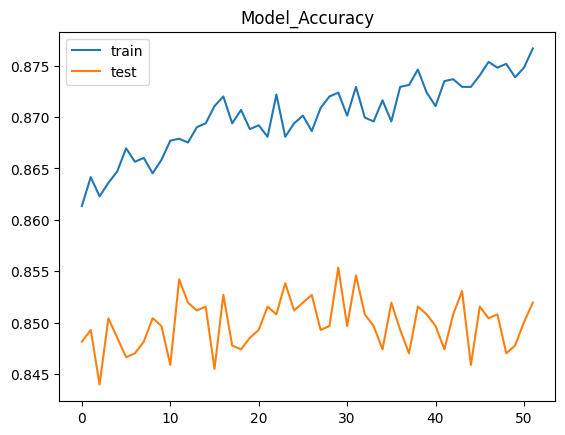

In [75]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model_Accuracy")
plt.legend(['train','test'],loc='upper left')
plt.show()